<a href="https://colab.research.google.com/github/saritmaitra/S-P_Commodities/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Data for Paper.xlsx to Data for Paper.xlsx


In [0]:
df = pd.read_excel('Data for Paper.xlsx', index_col=0)
df.head()

,Date,Year,DatesAvailable,CrudeOilPrice,GoldPrice,NaturalGasPrice,SilverPrice
Month,,,,,,,
Aug,16,2019,"Aug 16, 2019",55.20,1532.45,2.215,17.203
Aug,15,2019,"Aug 15, 2019",54.78,1537.00,2.220,17.275
Aug,14,2019,"Aug 14, 2019",55.23,1527.80,2.143,17.280
Aug,13,2019,"Aug 13, 2019",57.10,1514.10,2.147,16.985
Aug,12,2019,"Aug 12, 2019",54.93,1517.20,2.105,17.071


In [0]:
df = df.drop(['Date', 'Year', 'NaturalGasPrice'], axis=1) # removing unnecessary columns
df.head()

,DatesAvailable,CrudeOilPrice,GoldPrice,SilverPrice
Month,,,,
Aug,"Aug 16, 2019",55.20,1532.45,17.203
Aug,"Aug 15, 2019",54.78,1537.00,17.275
Aug,"Aug 14, 2019",55.23,1527.80,17.280
Aug,"Aug 13, 2019",57.10,1514.10,16.985
Aug,"Aug 12, 2019",54.93,1517.20,17.071


In [0]:
df['DatesAvailable']= pd.to_datetime(df['DatesAvailable']) # converting 'DatesAvailable' to datetime
df.head()

,DatesAvailable,CrudeOilPrice,GoldPrice,SilverPrice
Month,,,,
Aug,2019-08-16,55.20,1532.45,17.203
Aug,2019-08-15,54.78,1537.00,17.275
Aug,2019-08-14,55.23,1527.80,17.280
Aug,2019-08-13,57.10,1514.10,16.985
Aug,2019-08-12,54.93,1517.20,17.071


In [0]:
df.set_index('DatesAvailable', inplace=True) # setting 'DatesAvailable' as index column
df.head()

,CrudeOilPrice,GoldPrice,SilverPrice
DatesAvailable,,,
2019-08-16,55.20,1532.45,17.203
2019-08-15,54.78,1537.00,17.275
2019-08-14,55.23,1527.80,17.280
2019-08-13,57.10,1514.10,16.985
2019-08-12,54.93,1517.20,17.071


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4989 entries, 2019-08-16 to 2000-01-04
Data columns (total 3 columns):
CrudeOilPrice    4981 non-null float64
GoldPrice        4989 non-null float64
SilverPrice      4989 non-null float64
dtypes: float64(3)
memory usage: 155.9 KB


In [0]:
df.isnull().sum() # missing values

CrudeOilPrice    8
GoldPrice        0
SilverPrice      0
dtype: int64

In [0]:
uploaded = files.upload()

Saving S&P Futures.csv.xlsx to S&P Futures.csv.xlsx


In [0]:
df1 = pd.read_excel('S&P Futures.csv.xlsx', parse_dates = True, index_col=0)
df1.head()

,Price
Date,
2019-07-29,3021.75
2019-07-26,3024.50
2019-07-25,3006.50
2019-07-24,3021.50
2019-07-23,3008.00


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2019-07-29 to 2000-01-03
Data columns (total 1 columns):
Price    5000 non-null float64
dtypes: float64(1)
memory usage: 78.1 KB


In [0]:
df1.isnull().sum()

Price    0
dtype: int64

In [0]:
DF = df1.loc['20190729':'20000104'] 
DF.head()

,Price
Date,
2019-07-29,3021.75
2019-07-26,3024.50
2019-07-25,3006.50
2019-07-24,3021.50
2019-07-23,3008.00


In [0]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4999 entries, 2019-07-29 to 2000-01-04
Data columns (total 1 columns):
Price    4999 non-null float64
dtypes: float64(1)
memory usage: 78.1 KB


In [0]:
data = [DF,df] # combining dataframes
result = pd.concat(data, axis=1)
result.head()

,Price,CrudeOilPrice,GoldPrice,SilverPrice
2000-01-04,1411.75,25.55,282.7,5.335
2000-01-05,1413.50,24.91,281.1,5.170
2000-01-06,1404.00,24.78,281.4,5.127
2000-01-07,1460.50,24.22,281.9,5.150
2000-01-10,1475.00,24.67,281.7,5.145


In [0]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5019 entries, 2000-01-04 to 2019-08-16
Data columns (total 4 columns):
Price            4999 non-null float64
CrudeOilPrice    4981 non-null float64
GoldPrice        4989 non-null float64
SilverPrice      4989 non-null float64
dtypes: float64(4)
memory usage: 196.1 KB


In [0]:
result.isnull().sum()

Price            20
CrudeOilPrice    38
GoldPrice        30
SilverPrice      30
dtype: int64

In [0]:
result = result.rename(columns = {"Price": "Index"}) # renaming column
result.head() # display 

,Index,CrudeOilPrice,GoldPrice,SilverPrice
2000-01-04,1411.75,25.55,282.7,5.335
2000-01-05,1413.50,24.91,281.1,5.170
2000-01-06,1404.00,24.78,281.4,5.127
2000-01-07,1460.50,24.22,281.9,5.150
2000-01-10,1475.00,24.67,281.7,5.145


In [0]:
result[result['Index'].isnull()]

,Index,CrudeOilPrice,GoldPrice,SilverPrice
2001-09-11,NaN,NaN,271.60,4.156
2001-09-14,NaN,29.53,290.20,4.293
2014-05-25,NaN,NaN,1291.70,19.430
2014-08-31,NaN,NaN,1287.70,19.480
2016-03-25,NaN,NaN,1216.70,15.200
2017-04-14,NaN,NaN,1289.65,18.545
2019-07-30,NaN,58.05,1441.80,16.558
2019-07-31,NaN,58.58,1437.80,16.405
2019-08-01,NaN,53.95,1432.40,16.180
2019-08-02,NaN,55.66,1457.50,16.270


In [0]:
# Taking care of missing data
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#imputer = imputer.fit(DATA)
#X[:, 1:3] = imputer.transform(X[:, 1:3]
#DATA.isnull().sum()

### Feature Scaling before ML
Most mathematical models are based on Euclidian Distances which means that the square distances can be overwhelming different from variable to variable making the model behave weirdly. Feature Scaling is the process that puts all the values in the same “range” of greatness so it doesn’t happen that one variable will end up dominating the other when it shouldn’t happen.

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) #Fit and transform
X_test = sc_X.transform(X_test) #Only trasform
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [0]:
DATA = result.fillna(method ='pad') # filling the missing values with previous ones 
DATA.isnull().sum()

Index            0
CrudeOilPrice    0
GoldPrice        0
SilverPrice      0
dtype: int64

In [0]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5019 entries, 1.0004967141530112 to 1.0246944660411927
Data columns (total 4 columns):
Index            5019 non-null float64
CrudeOilPrice    5019 non-null float64
GoldPrice        5019 non-null float64
SilverPrice      5019 non-null float64
dtypes: float64(4)
memory usage: 356.1 KB


In [0]:
DATA.head()

,Index,CrudeOilPrice,GoldPrice,SilverPrice
2000-01-04,1411.75,25.55,282.7,5.335
2000-01-05,1413.50,24.91,281.1,5.170
2000-01-06,1404.00,24.78,281.4,5.127
2000-01-07,1460.50,24.22,281.9,5.150
2000-01-10,1475.00,24.67,281.7,5.145


In [0]:
DATA.index.name = 'Date'
DATA.head()

,Index,CrudeOilPrice,GoldPrice,SilverPrice
Date,,,,
2000-01-04,1411.75,25.55,282.7,5.335
2000-01-05,1413.50,24.91,281.1,5.170
2000-01-06,1404.00,24.78,281.4,5.127
2000-01-07,1460.50,24.22,281.9,5.150
2000-01-10,1475.00,24.67,281.7,5.145


In [0]:
DATA.describe() # overall statistics

,Index,CrudeOilPrice,GoldPrice,SilverPrice
count,5019.000000,5019.000000,5019.000000,5019.000000
mean,1557.818828,61.978571,948.284921,14.934934
std,559.667254,26.382652,475.217036,8.560132
min,676.000000,17.450000,255.100000,4.026000
25%,1152.250000,40.420000,424.550000,7.001500
50%,1359.250000,59.000000,1095.600000,15.042000
75%,1965.625000,83.080000,1340.750000,18.141000
max,3024.500000,145.290000,1888.700000,48.584000


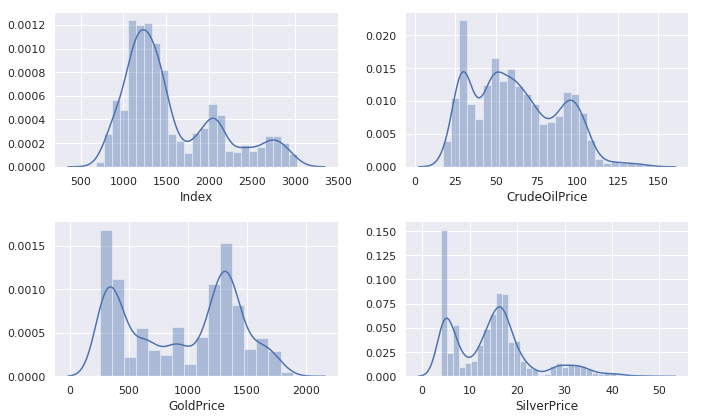

In [0]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(DATA.Index, color="b", ax=axes[0, 0])

sns.distplot(DATA.CrudeOilPrice, color="b", ax=axes[0, 1])

sns.distplot(DATA.GoldPrice, color="b",ax=axes[1, 0])

sns.distplot(DATA.SilverPrice, color="b", ax=axes[1, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()

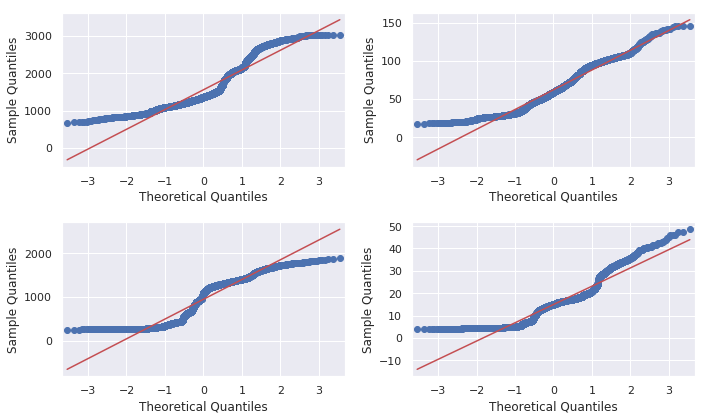

In [0]:
from statsmodels.graphics.gofplots import qqplot

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot a simple histogram with binsize determined automatically
qqplot(DATA.Index, line= 'r', ax=axes[0, 0], label='Index')

qqplot(DATA.CrudeOilPrice, line= 'r',label='CrudeOilPrice', ax=axes[0, 1])

qqplot(DATA.GoldPrice, line= 'r',label='GoldPrice',ax=axes[1, 0])

qqplot(DATA.SilverPrice, line= 'r',label='SilverPrice', ax=axes[1, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()

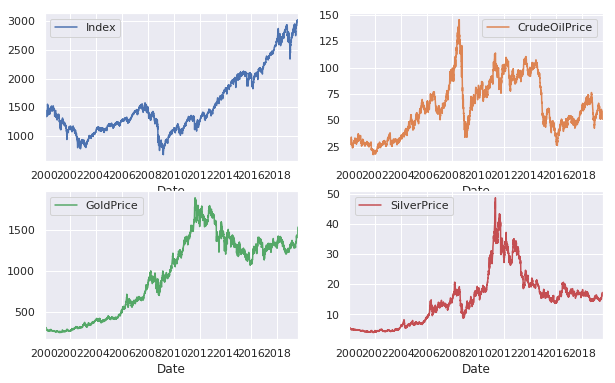

In [0]:
DATA.plot(subplots=True, layout=(2, 2), figsize=(10, 6), sharex=False);

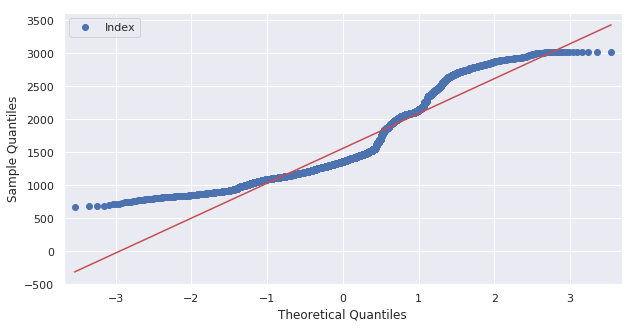

In [0]:
from statsmodels.graphics.gofplots import qqplot

qqplot(DATA.Index, line= 'r',label='Index')
plt.legend(loc='best')


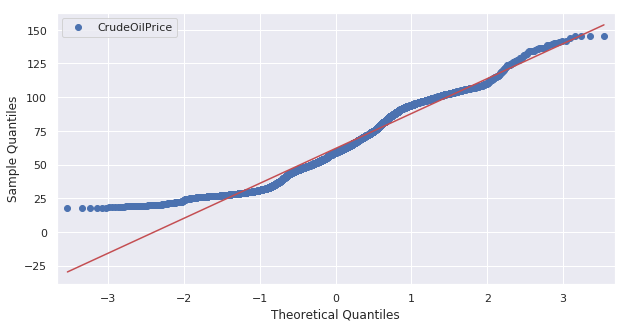

In [0]:
qqplot(DATA.CrudeOilPrice, line='r', label='CrudeOilPrice')
plt.legend(loc='best')


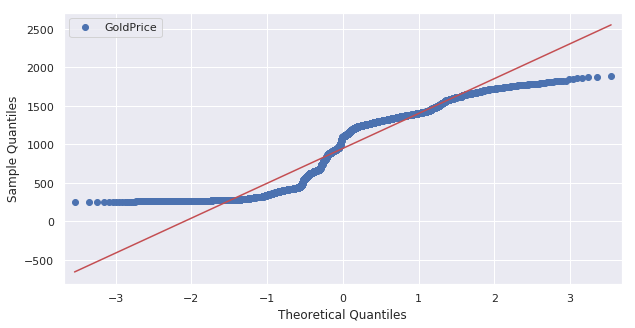

In [0]:
qqplot(DATA.GoldPrice, line='r', label='GoldPrice')
plt.legend(loc='best')


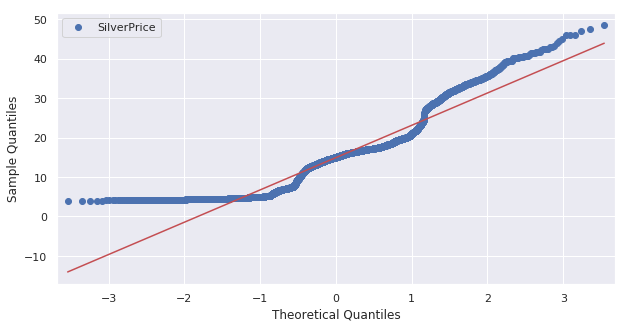

In [0]:
qqplot(DATA.SilverPrice, line='r', label='SilverPrice')
plt.legend(loc='best')


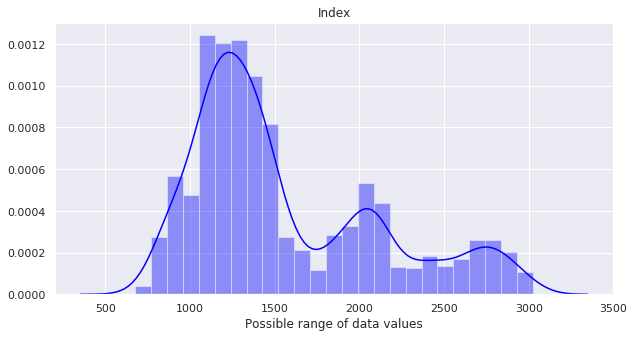

Skewness: 0.951968
************************************************************
Kurtosis: -0.119716
************************************************************


In [0]:
sns.set()
sns.distplot(DATA.Index, color='blue') #density plot
plt.title("Index")
plt.xlabel('Possible range of data values')
plt.show()
print('Skewness: %f' % DATA.Index.skew())
print('*'*60)
print('Kurtosis: %f' % DATA.Index.kurt())
print('*'*60)

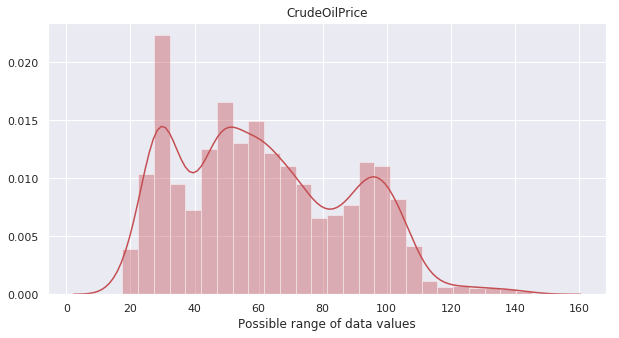

Skewness: 0.379145
************************************************************
Kurtosis: -0.727979
************************************************************


In [0]:
sns.distplot(DATA.CrudeOilPrice, color='r') #density plot
plt.title("CrudeOilPrice")
plt.xlabel('Possible range of data values')
plt.show()
print('Skewness: %f' % DATA.CrudeOilPrice.skew())
print('*'*60)
print('Kurtosis: %f' % DATA.CrudeOilPrice.kurt())
print('*'*60)

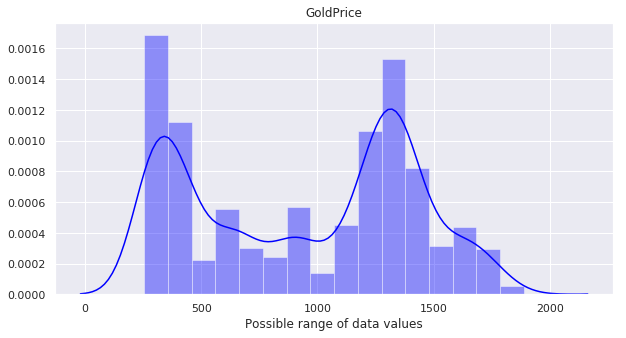

Skewness: -0.113354
************************************************************
Kurtosis: -1.438250
************************************************************


In [0]:
sns.distplot(DATA.GoldPrice, color='blue') #density plot
plt.title("GoldPrice")
plt.xlabel('Possible range of data values')
plt.show()
print('Skewness: %f' % DATA.GoldPrice.skew())
print('*'*60)
print('Kurtosis: %f' % DATA.GoldPrice.kurt())
print('*'*60)

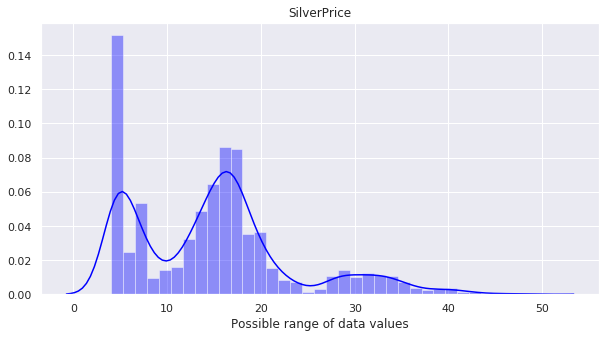

Skewness: 0.860165
************************************************************
Kurtosis: 0.576831
************************************************************


In [0]:
sns.distplot(DATA.SilverPrice, color='blue') #density plot
plt.title("SilverPrice")
plt.xlabel('Possible range of data values')
plt.show()
print('Skewness: %f' % DATA.SilverPrice.skew())
print('*'*60)
print('Kurtosis: %f' % DATA.SilverPrice.kurt())
print('*'*60)

In [0]:
DATA.skew(axis = 0) 

Index            0.951968
CrudeOilPrice    0.379145
GoldPrice       -0.113354
SilverPrice      0.860165
dtype: float64

In [0]:
from scipy.stats import kurtosis
kurtosis(DATA)

array([-0.12079172, -0.7284495 , -1.43801252,  0.57506161])

In [0]:
from scipy import stats
stats.jarque_bera(DATA.Index)

(760.6710093382862, 0.0)

In [0]:
stats.jarque_bera(DATA.CrudeOilPrice)

(231.14560901673914, 0.0)

In [0]:
stats.jarque_bera(DATA.GoldPrice)

(443.1872709049233, 0.0)

In [0]:
stats.jarque_bera(DATA.SilverPrice)

(687.7003791376196, 0.0)

In [0]:
from scipy import stats
stats.kstest(DATA.Index, 'norm')


KstestResult(statistic=1.0, pvalue=0.0)

In [0]:
stats.kstest(DATA.CrudeOilPrice, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [0]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(DATA)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.812, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [0]:
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

corr= DATA.corr(method='pearson') # correlation (pearson)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Index,CrudeOilPrice,GoldPrice,SilverPrice
Index,1,0.076,0.53,0.22
CrudeOilPrice,0.076,1,0.66,0.75
GoldPrice,0.53,0.66,1,0.9
SilverPrice,0.22,0.75,0.9,1


In [0]:
corr= DATA.corr(method='spearman') # coorelation (spearman)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Index,CrudeOilPrice,GoldPrice,SilverPrice
Index,1,0.23,0.53,0.43
CrudeOilPrice,0.23,1,0.71,0.79
GoldPrice,0.53,0.71,1,0.95
SilverPrice,0.43,0.79,0.95,1


In [0]:
from statsmodels.tsa.stattools import acf, ccf


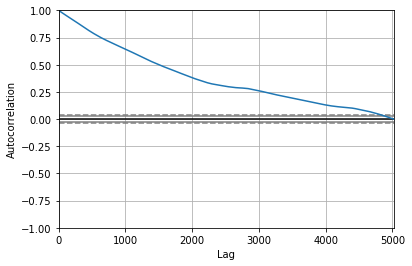

In [0]:
pd.plotting.autocorrelation_plot(DATA)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


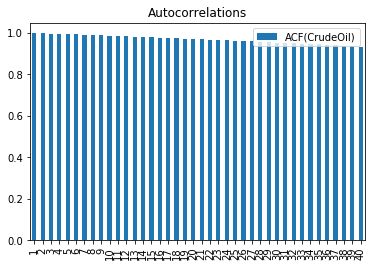

In [0]:
acf = pd.DataFrame(sm.tsa.stattools.acf(DATA.CrudeOilPrice), columns=['ACF(CrudeOil)'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


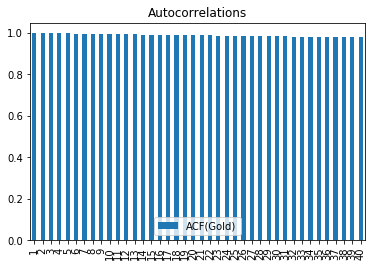

In [0]:
acf = pd.DataFrame(sm.tsa.stattools.acf(DATA.GoldPrice), columns=['ACF(Gold)'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

In [0]:
K=12
# compute CCF
ccf = 1/len(DATA.Index) * np.correlate(DATA.Index, DATA.CrudeOilPrice)
kappa = np.arange(-(K-1), 2*K)

# print mean values of signals
print('Mean of signal DATA.Index[k]: %f' %np.mean(DATA.Index))
print('Mean of signal DATA.CrudeOilPrice[k]: %f' %np.mean(DATA.CrudeOilPrice))



Mean of signal DATA.Index[k]: 1557.818828
Mean of signal DATA.CrudeOilPrice[k]: 61.978571


In [0]:
# covariance matrix
mean_vec = np.mean(DATA, axis=0)
cov_mat = (DATA - mean_vec).T.dot((DATA - mean_vec)) / (DATA.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
                       Index  CrudeOilPrice      GoldPrice  SilverPrice
Index          313227.435115    1129.186388  139763.898759  1067.915374
CrudeOilPrice    1129.186388     696.044301    8263.332436   170.107309
GoldPrice      139763.898759    8263.332436  225831.231039  3654.755151
SilverPrice      1067.915374     170.107309    3654.755151    73.275858


## Augmented Dickey Fuller test

In [0]:
pip install arch

     |████████████████████████████████| 706kB 2.8MB/s 


In [0]:
from arch.unitroot import ADF
adf = ADF(DATA.Index)
print('Index', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA.CrudeOilPrice)
print('CrudeOilPrice', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA.GoldPrice)
print('GoldPrice', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA.SilverPrice)
print('SilverPrice', adf.summary().as_text())

Index    Augmented Dickey-Fuller Results   
Test Statistic                  1.116
P-value                         0.995
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
CrudeOilPrice    Augmented Dickey-Fuller Results   
Test Statistic                 -2.020
P-value                         0.278
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
GoldPrice    Augmented Dickey-Fuller Results   
Test Statistic                 -0.933
P-value                         0.

### Dickey-Fuller GLS Testing
The Dickey-Fuller GLS test is an improved version of the ADF which uses a GLS-detrending regression before running an ADF regression with no additional deterministic terms. 
dfgls performs a modiﬁed Dickey–Fuller t test for a unit root in which the series has been transformed by a generalized least-squares regression.


In [0]:
from arch.unitroot import DFGLS
dfgls = DFGLS(DATA.Index)
print('Index', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA.CrudeOilPrice)
print('CrudeOil', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA.GoldPrice)
print('Gold', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA.SilverPrice)
print('Silver', dfgls.summary().as_text())


Index       Dickey-Fuller GLS Results      
Test Statistic                  1.464
P-value                         0.966
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
CrudeOil       Dickey-Fuller GLS Results      
Test Statistic                 -0.935
P-value                         0.320
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Gold       Dickey-Fuller GLS Results      
Test Statistic                  0.782
P-value                         0.893
Lags  

## Kwiatkowski–Phillips–Schmidt–Shin (KPSS)

In [0]:
from arch.unitroot import KPSS
kpss = KPSS(DATA.Index)
print(kpss.summary().as_text())
print('*'*60)


kpss = KPSS(DATA.CrudeOilPrice)
print(kpss.summary().as_text())
print('*'*60)

kpss = KPSS(DATA.GoldPrice)
print(kpss.summary().as_text())
print('*'*60)

from arch.unitroot import KPSS
kpss = KPSS(DATA.SilverPrice)
print(kpss.summary().as_text())
print('*'*60)

    KPSS Stationarity Test Results   
Test Statistic                  8.403
P-value                         0.000
Lags                               42
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
************************************************************
    KPSS Stationarity Test Results   
Test Statistic                  3.623
P-value                         0.000
Lags                               42
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
************************************************************
    KPSS Stationarity Test Results   
Test Statistic                  9.877
P-value                         0.000
Lags                            

## Variance ratio test
The variance ratio compares the variance of a 1-period return to that of a multi-period return. The comparison length has to be set when initializing the test.

This example compares 1-month to 12-month returns, and the null that the series is a pure random walk is rejected. Negative values indicate some positive autocorrelation in the returns (momentum).

In [0]:
from arch.unitroot import VarianceRatio
vr = VarianceRatio(DATA.Index, 12)
print('Index', vr.summary().as_text())
print('*'*60)

vr = VarianceRatio(DATA.CrudeOilPrice, 12)
print('CrudeOil', vr.summary().as_text())
print('*'*60)

vr = VarianceRatio(DATA.GoldPrice, 12)
print('Gold', vr.summary().as_text())
print('*'*60)

vr = VarianceRatio(DATA.SilverPrice, 12)
print('Silver', vr.summary().as_text())
print('*'*60)

Index      Variance-Ratio Test Results     
Test Statistic                 -4.969
P-value                         0.000
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)
************************************************************
CrudeOil      Variance-Ratio Test Results     
Test Statistic                 -1.660
P-value                         0.097
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)
************************************************************
Gold      Variance-Ratio Test Results     
Test Statistic                 -7.593
P-value                         0.000
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)
************************************************************
Silver      Variance-Ratio Test Results     
Test Statistic                  0.159
P-valu

By default the VR test uses all overlapping blocks to estimate the variance of the long period’s return. 

In [0]:
DATA_diff = DATA-DATA.shift().fillna(0) # differencing
DATA_log = np.log(DATA).diff().fillna(0) # log transform

In [0]:
from arch.unitroot import ADF
adf = ADF(DATA_diff.Index)
print('Index (Diff)', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA_diff.CrudeOilPrice)
print('CrudeOilPrice (Diff)', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA_diff.GoldPrice)
print('GoldPrice (Diff)', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA_diff.SilverPrice)
print('SilverPrice (Diff)', adf.summary().as_text())

Index (Diff)    Augmented Dickey-Fuller Results   
Test Statistic                -16.036
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
CrudeOilPrice (Diff)    Augmented Dickey-Fuller Results   
Test Statistic                -32.359
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
GoldPrice (Diff)    Augmented Dickey-Fuller Results   
Test Statistic                -21.674
P-value      

In [0]:
from arch.unitroot import KPSS
kpss = KPSS(DATA_diff.Index)
print(kpss.summary().as_text())
print('*'*60)


kpss = KPSS(DATA_diff.CrudeOilPrice)
print(kpss.summary().as_text())
print('*'*60)

kpss = KPSS(DATA_diff.GoldPrice)
print(kpss.summary().as_text())
print('*'*60)

from arch.unitroot import KPSS
kpss = KPSS(DATA_diff.SilverPrice)
print(kpss.summary().as_text())
print('*'*60)

    KPSS Stationarity Test Results   
Test Statistic                  0.091
P-value                         0.630
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
************************************************************
    KPSS Stationarity Test Results   
Test Statistic                  0.188
P-value                         0.294
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
************************************************************
    KPSS Stationarity Test Results   
Test Statistic                  0.128
P-value                         0.463
Lags                            

In [0]:
from arch.unitroot import DFGLS
dfgls = DFGLS(DATA_diff.Index)
print('Index', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA_diff.CrudeOilPrice)
print('CrudeOil', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA_diff.GoldPrice)
print('Gold', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA_diff.SilverPrice)
print('Silver', dfgls.summary().as_text())

Index       Dickey-Fuller GLS Results      
Test Statistic                 -0.085
P-value                         0.664
Lags                               31
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
CrudeOil       Dickey-Fuller GLS Results      
Test Statistic                 -0.055
P-value                         0.674
Lags                               31
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Gold       Dickey-Fuller GLS Results      
Test Statistic                 -0.166
P-value                         0.634
Lags  

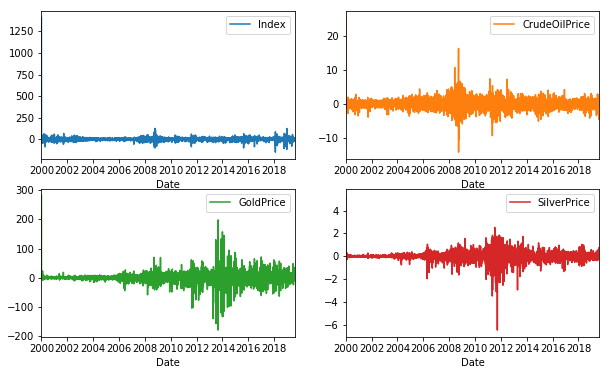

In [0]:
DATA_diff.plot(subplots=True, layout=(2, 2), figsize=(10, 6), sharex=False);

In [0]:
pip install -U statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.10.1)


In [0]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from datetime import datetime
import time



In [0]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
import seaborn as sns
sns.set();

index = DATA[['Index']].copy()
lag1, lag2  = 2,20
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(index[lag:], index[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

gold = DATA[['GoldPrice']]
lag1, lag2  = 2,20
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(gold[lag:], gold[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

crude = DATA[['CrudeOilPrice']]
lag1, lag2  = 2,20
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(crude[lag:], crude[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

silver = DATA[['SilverPrice']]
lag1, lag2  = 2,20
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(silver[lag:], silver[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2


print('*'*60)
print( 'hurst (Index), 2-20 lags = ',hurst[0])
print('*'*60)
print( 'hurst (Crude), 2-20 lags = ',hurst[0])
print('*'*60)
print( 'hurst (Gold), 2-20 lags = ',hurst[0])
print('*'*60)
print( 'hurst (Silver), 2-20 lags = ',hurst[0])
print('*'*60)

************************************************************
hurst (Index), 2-20 lags =  0.5039111084616279
************************************************************
hurst (Crude), 2-20 lags =  0.5039111084616279
************************************************************
hurst (Gold), 2-20 lags =  0.5039111084616279
************************************************************
hurst (Silver), 2-20 lags =  0.5039111084616279
************************************************************


In [0]:
index = DATA[['Index']].copy()
lag1, lag2  =100,200
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(index[lag:], index[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

gold = DATA[['GoldPrice']]
lag1, lag2  = 100,200
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(gold[lag:], gold[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

crude = DATA[['CrudeOilPrice']]
lag1, lag2  = 100,200
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(crude[lag:], crude[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

silver = DATA[['SilverPrice']]
lag1, lag2  = 100,200
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(silver[lag:], silver[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2


print('*'*60)
print( 'hurst (Index), 100-200 lags = ',hurst[0])
print('*'*60)
print( 'hurst (Crude), 100-200 lags = ',hurst[0])
print('*'*60)
print( 'hurst (Gold), 100-200 lags = ',hurst[0])
print('*'*60)
print( 'hurst (Silver), 100-200 lags = ',hurst[0])
print('*'*60)

************************************************************
hurst (Index), 100-200 lags =  0.5568990414816811
************************************************************
hurst (Crude), 100-200 lags =  0.5568990414816811
************************************************************
hurst (Gold), 100-200 lags =  0.5568990414816811
************************************************************
hurst (Silver), 100-200 lags =  0.5568990414816811
************************************************************


In [0]:
index = DATA[['Index']].copy()
lag1, lag2  =300,400
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(index[lag:], index[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

gold = DATA[['GoldPrice']]
lag1, lag2  = 300,400
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(gold[lag:], gold[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

crude = DATA[['CrudeOilPrice']]
lag1, lag2  = 300,400
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(crude[lag:], crude[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

silver = DATA[['SilverPrice']]
lag1, lag2  = 300,400
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(silver[lag:], silver[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

print('*'*60)
print( 'hurst (Index), 300-400 lags = ',hurst[0])
print('*'*60)
print( 'hurst (Crude), 300-400 lags = ',hurst[0])
print('*'*60)
print( 'hurst (Gold), 300-400 lags = ',hurst[0])
print('*'*60)
print( 'hurst (Silver), 300-400 lags = ',hurst[0])
print('*'*60)

************************************************************
hurst (Index), 300-400 lags =  0.4825748560214478
************************************************************
hurst (Crude), 300-400 lags =  0.4825748560214478
************************************************************
hurst (Gold), 300-400 lags =  0.4825748560214478
************************************************************
hurst (Silver), 300-400 lags =  0.4825748560214478
************************************************************


In [0]:
pip install hurst

H=0.636, c=0.862


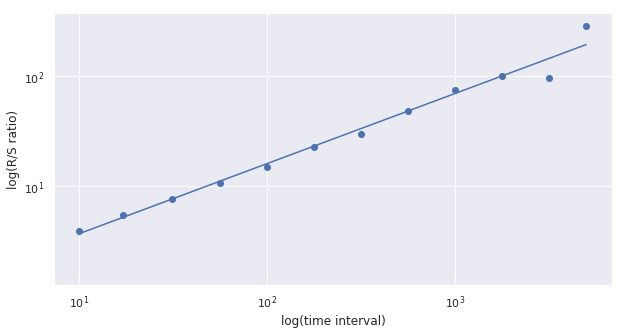

In [0]:
from hurst import compute_Hc, random_walk
import seaborn as sns
sns.set();
%matplotlib inline

np.random.seed(42)
random_changes = 1. + np.random.randn(5019) / 1000.
DATA.index = np.cumprod(random_changes)  
H, c, result = compute_Hc(DATA.Index, kind='price', simplified=True)


plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

H=0.585, c=1.031


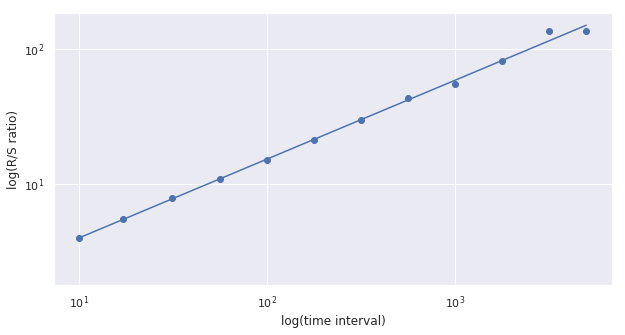

In [0]:
DATA.CrudeOilPrice = np.cumprod(random_changes)  
H, c, result = compute_Hc(DATA.CrudeOilPrice, kind='price', simplified=True)

plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

H=0.585, c=1.031


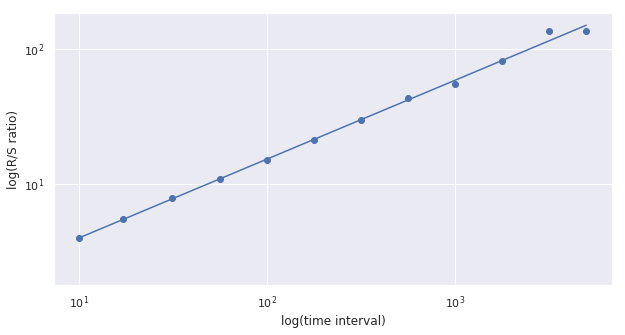

In [0]:
DATA.GoldPrice = np.cumprod(random_changes)  
H, c, result = compute_Hc(DATA.GoldPrice, kind='price', simplified=True)

plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

H=0.585, c=1.031


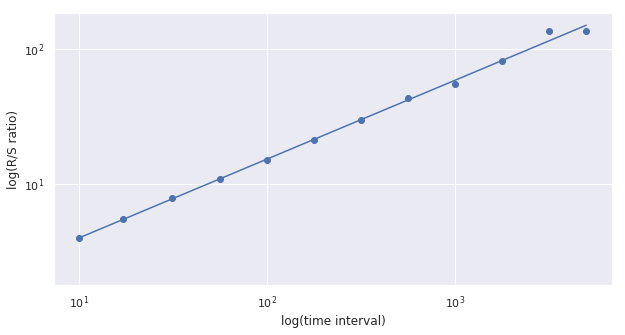

In [0]:
DATA.SilverPrice = np.cumprod(random_changes)  
H, c, result = compute_Hc(DATA.SilverPrice, kind='price', simplified=True)

plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

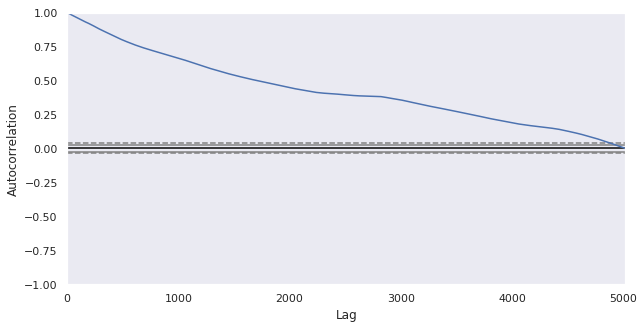

In [0]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(DATA)
pyplot.show()

In [0]:
pip install PyRQA

     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 471kB 14.8MB/s 
     |████████████████████████████████| 727kB 39.4MB/s 
     |████████████████████████████████| 61kB 23.4MB/s 
  Created wheel for PyRQA: filename=PyRQA-4.0.0-cp36-none-any.whl size=142673 sha256=3b673ac7b9da83cccaf00a2bfdae75050b491393ca3a2bd6e62af8e87521452c
  Stored in directory: /root/.cache/pip/wheels/d6/2e/84/0a9e78be27a88811be8cbc39f7e7eb34b0cacada6b28c1d154
  Created wheel for Mako: filename=Mako-1.1.0-cp36-none-any.whl size=75361 sha256=66eae10911c38383aaae7e0b96bb522483e942cec596480d3d19e0ea51d1ec67
  Stored in directory: /root/.cache/pip/wheels/98/32/7b/a291926643fc1d1e02593e0d9e247c5a866a366b8343b7aa27
  Created wheel for pytools: filename=pytools-2019.1.1-py2.py3-none-any.whl size=58425 sha256=07dfff6dca1e39230f8673b59d2691fefe77ebcedf71ab961096a6582d207ef2
  Stored in directory: /root/.cache/pip/wheels/83/df/0b/75ac4572aaa93e3eba6a58472635d0fda907f5f4cf884a3a0c
Su

In [0]:
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
from pyrqa.computing_type import ComputingType
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation

time_series = TimeSeries(DATA.Index,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    computing_type=ComputingType.Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_lelngth = 2
print(result)

[Platform 'NVIDIA CUDA']
Vendor: NVIDIA Corporation
Version: OpenCL 1.2 CUDA 10.0.211
Profile: FULL_PROFILE
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_copy_opts cl_nv_create_buffer


[Device 'Tesla K80']
Vendor: NVIDIA Corporation
Type: 4
Version: OpenCL 1.2 CUDA
Profile: FULL_PROFILE
Max Clock Frequency: 823
Global Mem Size: 11996954624
Address Bits: 64
Max Compute Units: 13
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1024, 64]
Local Mem Size: 49152
Max Mem Alloc Size: 2999238656
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing

In [0]:
time_series = TimeSeries(DATA.CrudeOilPrice,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    computing_type=ComputingType.Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_lelngth = 2
print(result)

[Platform 'NVIDIA CUDA']
Vendor: NVIDIA Corporation
Version: OpenCL 1.2 CUDA 10.0.211
Profile: FULL_PROFILE
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_copy_opts cl_nv_create_buffer


[Device 'Tesla K80']
Vendor: NVIDIA Corporation
Type: 4
Version: OpenCL 1.2 CUDA
Profile: FULL_PROFILE
Max Clock Frequency: 823
Global Mem Size: 11996954624
Address Bits: 64
Max Compute Units: 13
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1024, 64]
Local Mem Size: 49152
Max Mem Alloc Size: 2999238656
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing

In [0]:
time_series = TimeSeries(DATA.GoldPrice,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    computing_type=ComputingType.Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_lelngth = 2
print(result)

[Platform 'NVIDIA CUDA']
Vendor: NVIDIA Corporation
Version: OpenCL 1.2 CUDA 10.0.211
Profile: FULL_PROFILE
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_copy_opts cl_nv_create_buffer


[Device 'Tesla K80']
Vendor: NVIDIA Corporation
Type: 4
Version: OpenCL 1.2 CUDA
Profile: FULL_PROFILE
Max Clock Frequency: 823
Global Mem Size: 11996954624
Address Bits: 64
Max Compute Units: 13
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1024, 64]
Local Mem Size: 49152
Max Mem Alloc Size: 2999238656
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing

In [0]:
time_series = TimeSeries(DATA.SilverPrice,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    computing_type=ComputingType.Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_lelngth = 2
print(result)

[Platform 'NVIDIA CUDA']
Vendor: NVIDIA Corporation
Version: OpenCL 1.2 CUDA 10.0.211
Profile: FULL_PROFILE
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_copy_opts cl_nv_create_buffer


[Device 'Tesla K80']
Vendor: NVIDIA Corporation
Type: 4
Version: OpenCL 1.2 CUDA
Profile: FULL_PROFILE
Max Clock Frequency: 823
Global Mem Size: 11996954624
Address Bits: 64
Max Compute Units: 13
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1024, 64]
Local Mem Size: 49152
Max Mem Alloc Size: 2999238656
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing

In [0]:
!pip install pyunicorn


     |████████████████████████████████| 890kB 44.7MB/s 
     |████████████████████████████████| 378kB 46.8MB/s 
  Created wheel for pyunicorn: filename=pyunicorn-0.6.1-cp36-cp36m-linux_x86_64.whl size=1119573 sha256=2f5b6548667a6e093c8f2a6490a6f02c6786b4344b39ef9d0f3e58c7b4afe178
  Stored in directory: /root/.cache/pip/wheels/09/6d/61/e31b490ed9811039683392678eccdb6098986b7251aa064c39
  Created wheel for python-igraph: filename=python_igraph-0.7.1.post6-cp36-cp36m-linux_x86_64.whl size=2218253 sha256=a631d3524dbddd65fb9d939baae7c690e708f6480adfa5cb4c0f18beed9da326
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built pyunicorn python-igraph


In [0]:
pip install -U pip setuptools

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.2.2)
Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (41.1.0)


In [0]:
pip install pyts

     |████████████████████████████████| 92kB 34.2MB/s 


In [0]:
DATA_diff = DATA-DATA.shift().fillna(0) # differencing
DATA_log = np.log(DATA).diff().fillna(0) # log transform


## Testing Causation using Granger’s Causality Test

In [0]:
from statsmodels.tsa.stattools import grangercausalitytests

In [0]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(X, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    DATA = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in DATA.columns:
        for r in DATA.index:
            test_result = grangercausalitytests(X[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            DATA.loc[r, c] = min_p_value
    DATA.columns = [var + '_x' for var in variables]
    DATA.index = [var + '_y' for var in variables]
    return DATA

In [0]:
grangers_causation_matrix(DATA, variables = DATA.columns)    

,Index_x,CrudeOilPrice_x,GoldPrice_x,SilverPrice_x
Index_y,1.0000,0.0065,0.0719,0.3125
CrudeOilPrice_y,0.0000,1.0000,0.0000,0.0000
GoldPrice_y,0.2197,0.0024,1.0000,0.0000
SilverPrice_y,0.0000,0.0000,0.0088,1.0000


## Cointegration Test
Cointegration test helps to establish the presence of a statistically significant connection between the time series.
When the time series are cointegrated, it means they have a long run, statistically significant relationship which is  the basic premise on which Vector Autoregression(VAR) models is based on. 

In [0]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(DATA, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(DATA,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 4): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(DATA.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(DATA)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Index ::  34.53     > 40.1749   =>   False
CrudeOilPrice ::  17.26     > 24.2761   =>   False
GoldPrice ::  4.85      > 12.3212   =>   False
SilverPrice ::  0.76      > 4.1296    =>   False


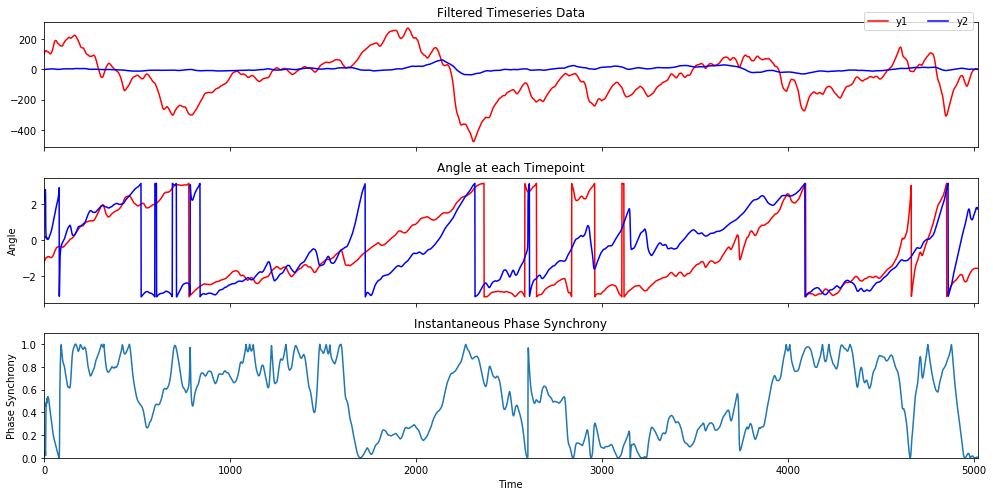

In [0]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(DATA, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, DATA)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = DATA.Index.interpolate().values
d2 = DATA.CrudeOilPrice.interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()


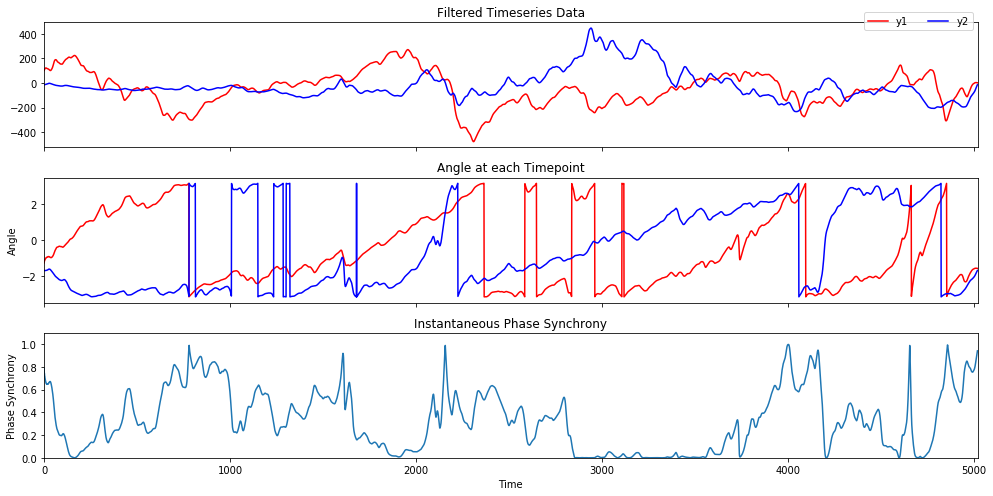

In [0]:
d1 = DATA.Index.interpolate().values
d2 = DATA.GoldPrice.interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

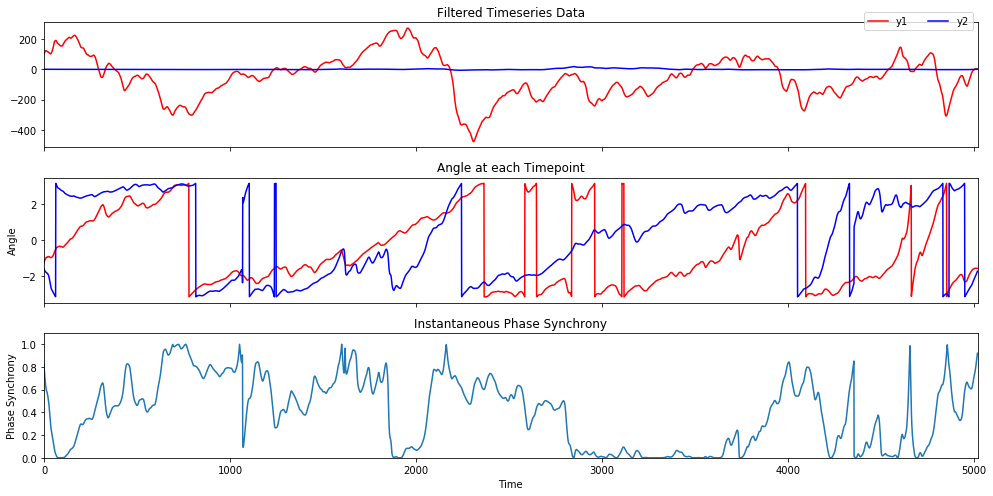

In [0]:
d1 = DATA.Index.interpolate().values
d2 = DATA.SilverPrice.interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

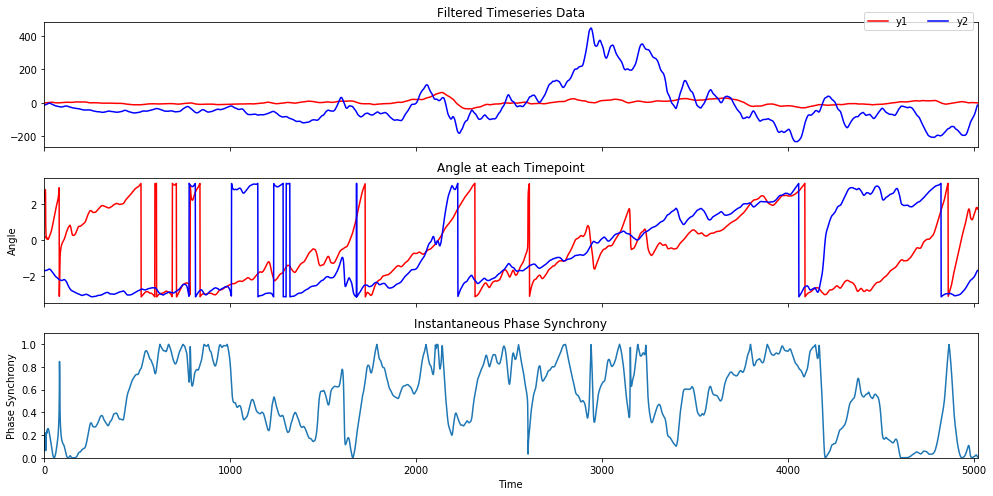

In [0]:
d1 = DATA.CrudeOilPrice.interpolate().values
d2 = DATA.GoldPrice.interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

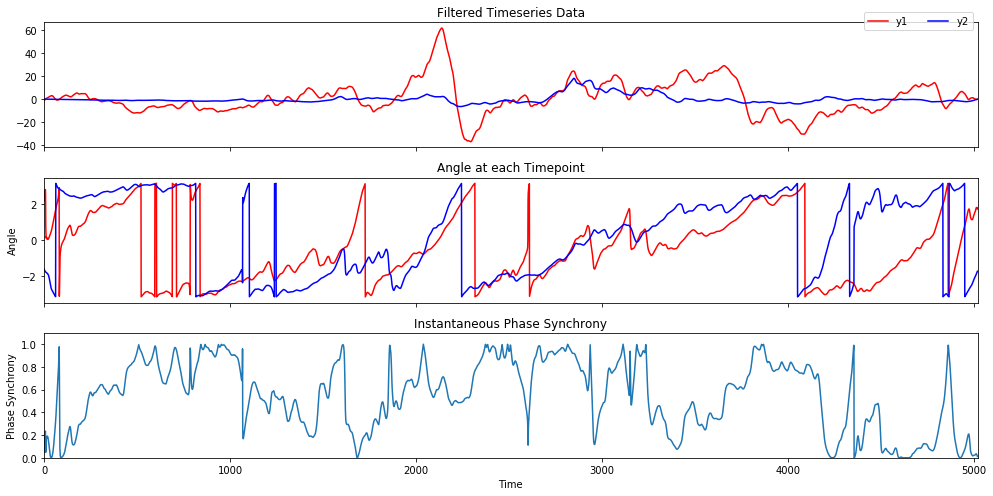

In [0]:
d1 = DATA.CrudeOilPrice.interpolate().values
d2 = DATA.SilverPrice.interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

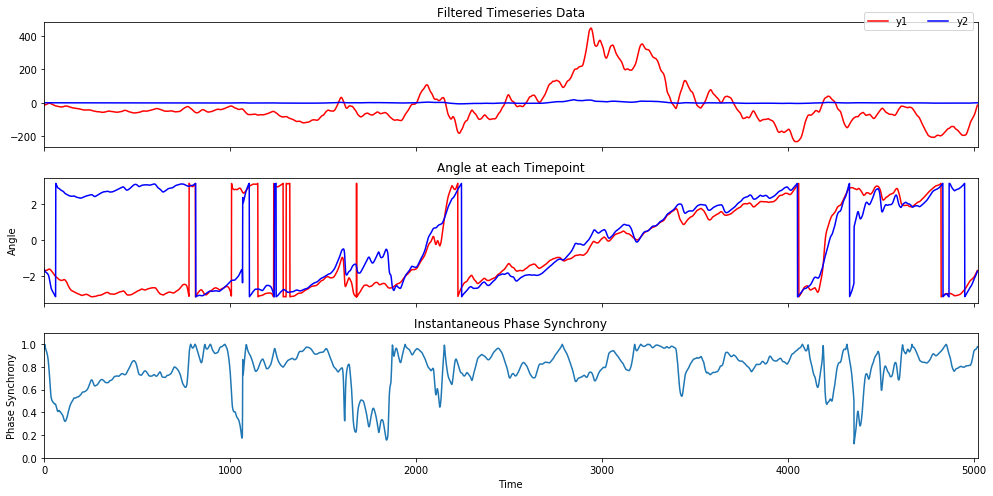

In [0]:
d1 = DATA.GoldPrice.interpolate().values
d2 = DATA.SilverPrice.interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

## VAR model

In [0]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
#DATA_log = np.log(DATA).diff().dropna()
# make a VAR model
model = VAR(DATA_diff)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### Lag order selection
Choice of lag order can be a difficult problem. Standard analysis employs likelihood test or information criteria-based order selection. We have implemented the latter, accessible through the VAR class.

In [0]:
model.select_order(12)

In [0]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  9.165433553497385
BIC :  9.191423137901236
FPE :  9560.865698054447
HQIC:  9.174540836681278 

Lag Order = 2
AIC :  9.133282748090487
BIC :  9.180071894449155
FPE :  9258.365160253528
HQIC:  9.149678789653176 

Lag Order = 3
AIC :  9.127860651288398
BIC :  9.195456381009343
FPE :  9208.301542159672
HQIC:  9.151548058883012 

Lag Order = 4
AIC :  9.12393758136031
BIC :  9.212346919670766
FPE :  9172.248025755633
HQIC:  9.154918964100101 

Lag Order = 5
AIC :  9.125427973394482
BIC :  9.234657949344289
FPE :  9185.92930875207
HQIC:  9.163705941853923 

Lag Order = 6
AIC :  9.129594936115927
BIC :  9.25965258258039
FPE :  9224.287838661636
HQIC:  9.175172102331832 

Lag Order = 7
AIC :  9.127482485044645
BIC :  9.278374838727377
FPE :  9204.824259433499
HQIC:  9.180361462517276 

Lag Order = 8
AIC :  9.129905196182206
BIC :  9.301639297617983
FPE :  9227.154186688598
HQIC:  9.19008859987638 

Lag Order = 9
AIC :  9.128995613327783
BIC :  9.321578506885404
FPE :  9218.

In [0]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,9.253,9.258,1.043e+04,9.255
1,9.158,9.184,9493.,9.167
2,9.134,9.181*,9262.,9.150*
3,9.131,9.199,9241.,9.155
4,9.128*,9.217,9211.*,9.159
5,9.129,9.239,9221.,9.168
6,9.132,9.263,9250.,9.178
7,9.130,9.281,9224.,9.182
8,9.132,9.304,9244.,9.192
9,9.130,9.323,9230.,9.198


In [0]:
A = model.fit(maxlags=4, ic='aic') # pass a maximum number of lags and the order criterion to use for order selection
A.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 19, Aug, 2019
Time:                     16:02:00
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.21235
Nobs:                     5015.00    HQIC:                   9.15492
Log likelihood:          -51274.2    FPE:                    9172.25
AIC:                      9.12394    Det(Omega_mle):         9048.93
--------------------------------------------------------------------
Results for equation Index
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.310836         0.228582            1.360           0.174
L1.Index                -0.030997         0.014552           -2.130           0.033
L1.CrudeOilPrice        -0.269319         0.1771

In [0]:
R1=A.test_causality('Index', ['CrudeOilPrice', 'GoldPrice', 'SilverPrice'], kind='f')
print(R1)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause Index: fail to reject at 5% significance level. Test statistic: 1.194, critical value: 1.753>, p-value: 0.281>


In [0]:
R2=A.test_causality('CrudeOilPrice', ['Index', 'GoldPrice', 'SilverPrice'], kind='f')
print(R2)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause CrudeOilPrice: reject at 5% significance level. Test statistic: 5.811, critical value: 1.753>, p-value: 0.000>


In [0]:
R3=A.test_causality('GoldPrice', ['Index', 'CrudeOilPrice', 'SilverPrice'], kind='f')
print(R3)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause GoldPrice: reject at 5% significance level. Test statistic: 12.525, critical value: 1.753>, p-value: 0.000>


In [0]:
R4=A.test_causality('SilverPrice', ['Index', 'GoldPrice', 'CrudeOilPrice'], kind='f')
print(R4)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause SilverPrice: reject at 5% significance level. Test statistic: 5.263, critical value: 1.753>, p-value: 0.000>


In [0]:
R5=A.test_causality('Index', ['CrudeOilPrice'], kind='f')
print(R5)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: CrudeOilPrice does not Granger-cause Index: fail to reject at 5% significance level. Test statistic: 1.121, critical value: 2.372>, p-value: 0.345>


In [0]:
granger_test_result = grangercausalitytests(DATA_diff[['Index', 'CrudeOilPrice']].values,maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8565  , p=0.0496  , df_denom=5015, df_num=1
ssr based chi2 test:   chi2=3.8588  , p=0.0495  , df=1
likelihood ratio test: chi2=3.8573  , p=0.0495  , df=1
parameter F test:         F=3.8565  , p=0.0496  , df_denom=5015, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0076  , p=0.1344  , df_denom=5012, df_num=2
ssr based chi2 test:   chi2=4.0193  , p=0.1340  , df=2
likelihood ratio test: chi2=4.0177  , p=0.1341  , df=2
parameter F test:         F=2.0076  , p=0.1344  , df_denom=5012, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1823  , p=0.3148  , df_denom=5009, df_num=3
ssr based chi2 test:   chi2=3.5519  , p=0.3141  , df=3
likelihood ratio test: chi2=3.5507  , p=0.3143  , df=3
parameter F test:         F=1.1823  , p=0.3148  , df_denom=5009, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1852  , p=0.

In [0]:
granger_test_result = grangercausalitytests(DATA_diff[['Index', 'GoldPrice']].values,maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0468  , p=0.8287  , df_denom=5015, df_num=1
ssr based chi2 test:   chi2=0.0468  , p=0.8287  , df=1
likelihood ratio test: chi2=0.0468  , p=0.8287  , df=1
parameter F test:         F=0.0468  , p=0.8287  , df_denom=5015, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6723  , p=0.1879  , df_denom=5012, df_num=2
ssr based chi2 test:   chi2=3.3479  , p=0.1875  , df=2
likelihood ratio test: chi2=3.3468  , p=0.1876  , df=2
parameter F test:         F=1.6723  , p=0.1879  , df_denom=5012, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5723  , p=0.6332  , df_denom=5009, df_num=3
ssr based chi2 test:   chi2=1.7192  , p=0.6327  , df=3
likelihood ratio test: chi2=1.7189  , p=0.6327  , df=3
parameter F test:         F=0.5723  , p=0.6332  , df_denom=5009, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1702  , p=0.

In [0]:
granger_test_result = grangercausalitytests(DATA_diff[['Index', 'SilverPrice']].values,maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1471  , p=0.2842  , df_denom=5015, df_num=1
ssr based chi2 test:   chi2=1.1478  , p=0.2840  , df=1
likelihood ratio test: chi2=1.1477  , p=0.2840  , df=1
parameter F test:         F=1.1471  , p=0.2842  , df_denom=5015, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2669  , p=0.2818  , df_denom=5012, df_num=2
ssr based chi2 test:   chi2=2.5363  , p=0.2814  , df=2
likelihood ratio test: chi2=2.5357  , p=0.2814  , df=2
parameter F test:         F=1.2669  , p=0.2818  , df_denom=5012, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4706  , p=0.7028  , df_denom=5009, df_num=3
ssr based chi2 test:   chi2=1.4137  , p=0.7023  , df=3
likelihood ratio test: chi2=1.4135  , p=0.7024  , df=3
parameter F test:         F=0.4706  , p=0.7028  , df_denom=5009, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4352  , p=0.

In [0]:
granger_test_result = grangercausalitytests(DATA_diff[['CrudeOilPrice', 'SilverPrice']].values,maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1598  , p=0.6893  , df_denom=5015, df_num=1
ssr based chi2 test:   chi2=0.1599  , p=0.6892  , df=1
likelihood ratio test: chi2=0.1599  , p=0.6892  , df=1
parameter F test:         F=0.1598  , p=0.6893  , df_denom=5015, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11.1674 , p=0.0000  , df_denom=5012, df_num=2
ssr based chi2 test:   chi2=22.3571 , p=0.0000  , df=2
likelihood ratio test: chi2=22.3074 , p=0.0000  , df=2
parameter F test:         F=11.1674 , p=0.0000  , df_denom=5012, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.6104  , p=0.0000  , df_denom=5009, df_num=3
ssr based chi2 test:   chi2=22.8632 , p=0.0000  , df=3
likelihood ratio test: chi2=22.8112 , p=0.0000  , df=3
parameter F test:         F=7.6104  , p=0.0000  , df_denom=5009, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.9051  , p=0.

In [0]:
granger_test_result = grangercausalitytests(DATA_diff[['CrudeOilPrice', 'GoldPrice']].values,maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2592  , p=0.6107  , df_denom=5015, df_num=1
ssr based chi2 test:   chi2=0.2594  , p=0.6105  , df=1
likelihood ratio test: chi2=0.2594  , p=0.6105  , df=1
parameter F test:         F=0.2592  , p=0.6107  , df_denom=5015, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.6186  , p=0.0001  , df_denom=5012, df_num=2
ssr based chi2 test:   chi2=19.2563 , p=0.0001  , df=2
likelihood ratio test: chi2=19.2195 , p=0.0001  , df=2
parameter F test:         F=9.6186  , p=0.0001  , df_denom=5012, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.8210  , p=0.0001  , df_denom=5009, df_num=3
ssr based chi2 test:   chi2=20.4917 , p=0.0001  , df=3
likelihood ratio test: chi2=20.4499 , p=0.0001  , df=3
parameter F test:         F=6.8210  , p=0.0001  , df_denom=5009, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.4605  , p=0.

In [0]:
granger_test_result = grangercausalitytests(DATA_diff[['GoldPrice', 'SilverPrice']].values,maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=111.5422, p=0.0000  , df_denom=5015, df_num=1
ssr based chi2 test:   chi2=111.6089, p=0.0000  , df=1
likelihood ratio test: chi2=110.3858, p=0.0000  , df=1
parameter F test:         F=111.5422, p=0.0000  , df_denom=5015, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=64.0761 , p=0.0000  , df_denom=5012, df_num=2
ssr based chi2 test:   chi2=128.2801, p=0.0000  , df=2
likelihood ratio test: chi2=126.6676, p=0.0000  , df=2
parameter F test:         F=64.0761 , p=0.0000  , df_denom=5012, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=45.3718 , p=0.0000  , df_denom=5009, df_num=3
ssr based chi2 test:   chi2=136.3056, p=0.0000  , df=3
likelihood ratio test: chi2=134.4865, p=0.0000  , df=3
parameter F test:         F=45.3718 , p=0.0000  , df_denom=5009, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=35.5224 , p=0.

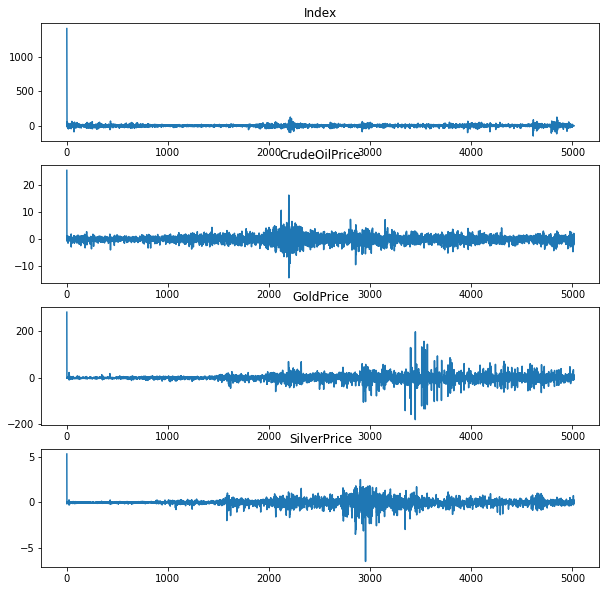

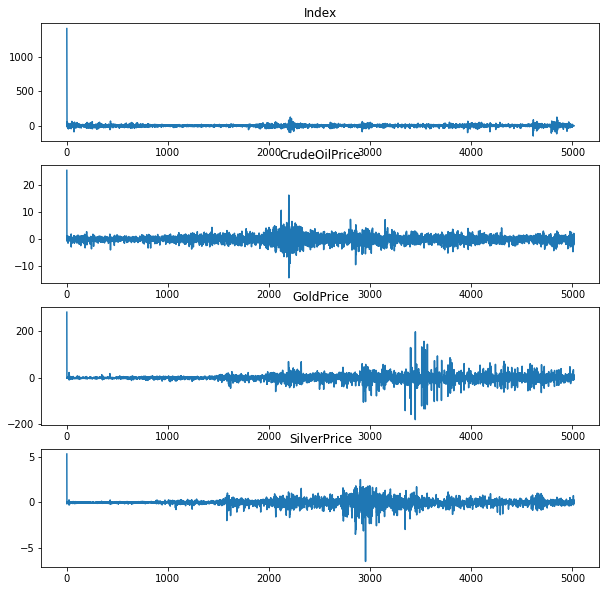

In [0]:
A.plot()

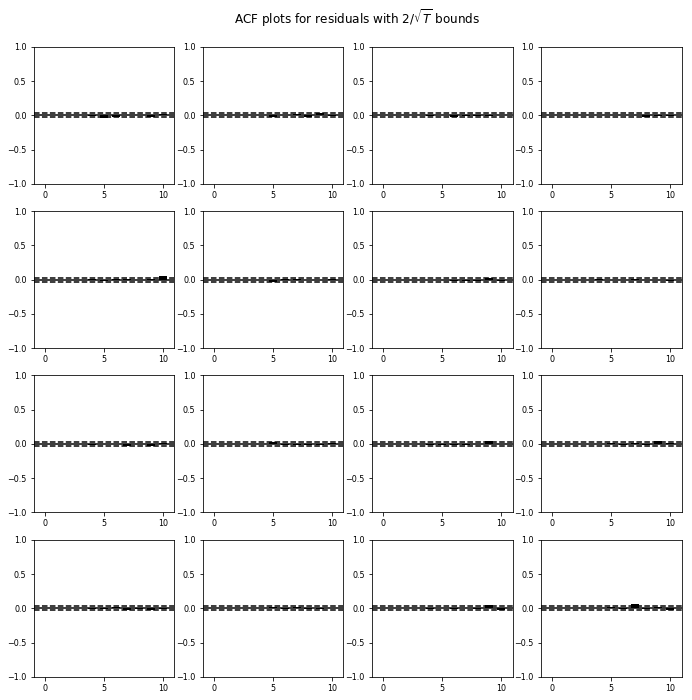

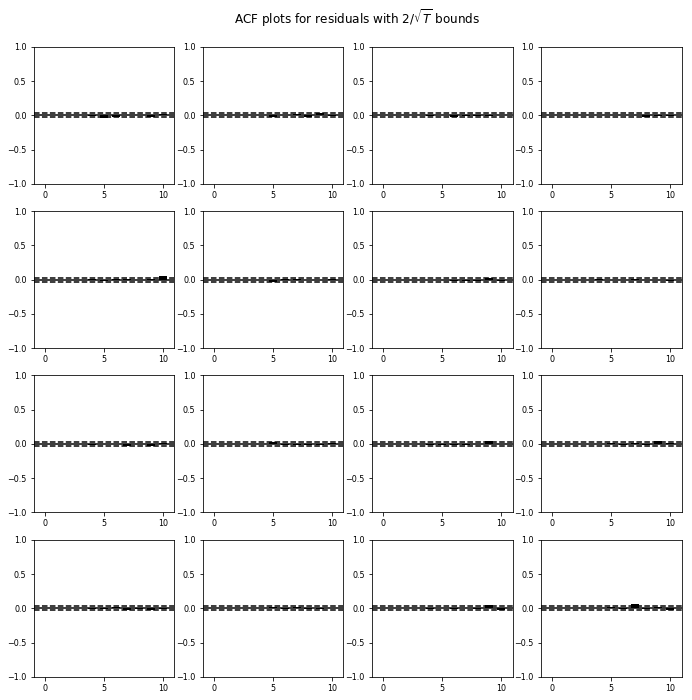

In [0]:
A.plot_acorr()

In [0]:
irf = A.irf(4)

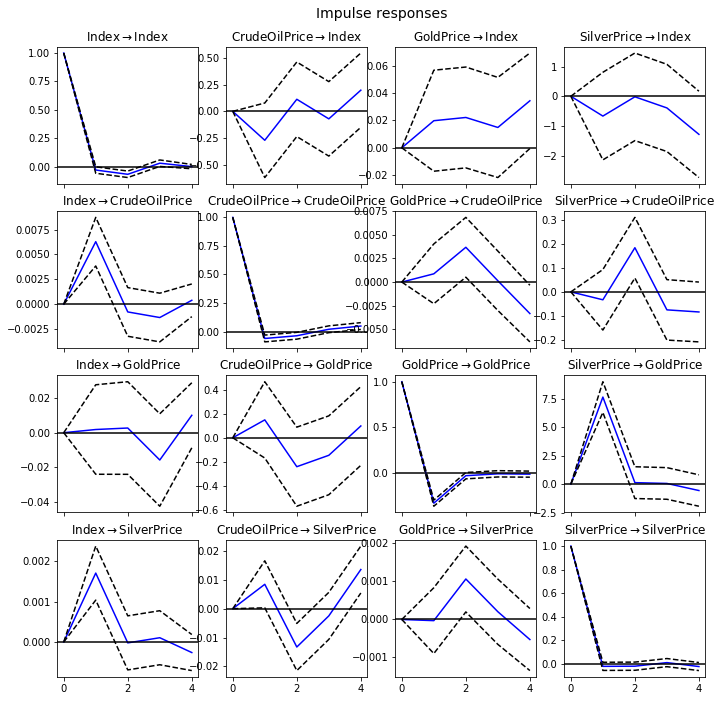

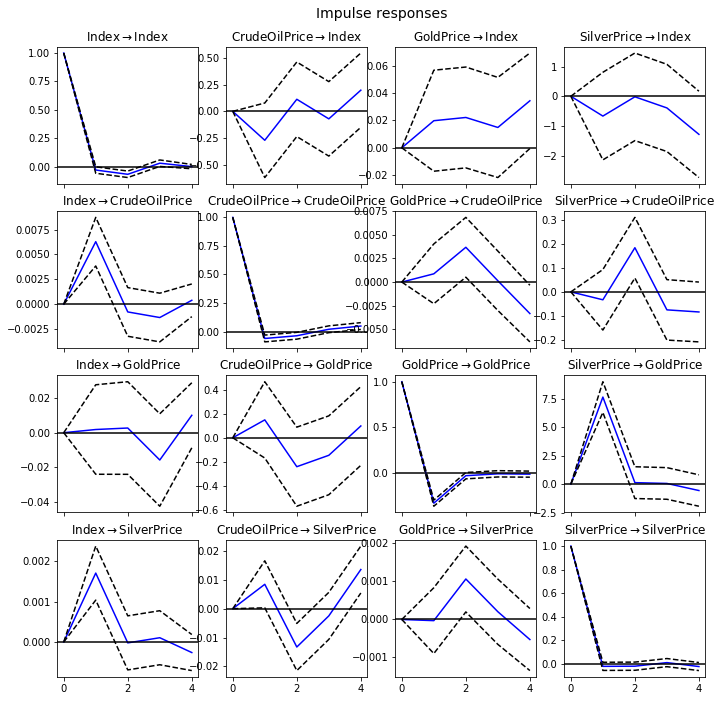

In [0]:
irf.plot(orth=False)


In [0]:
fevd = A.fevd(4)

In [0]:
fevd.summary()

FEVD for Index
        Index  CrudeOilPrice  GoldPrice  SilverPrice
0    1.000000       0.000000   0.000000     0.000000
1    0.999202       0.000550   0.000092     0.000156
2    0.998648       0.000725   0.000471     0.000156
3    0.998491       0.000757   0.000543     0.000209

FEVD for CrudeOilPrice
        Index  CrudeOilPrice  GoldPrice  SilverPrice
0    0.049959       0.950041   0.000000     0.000000
1    0.053033       0.946895   0.000019     0.000052
2    0.052883       0.941329   0.004126     0.001663
3    0.053017       0.940848   0.004207     0.001929

FEVD for GoldPrice
        Index  CrudeOilPrice  GoldPrice  SilverPrice
0    0.000089       0.040854   0.959057     0.000000
1    0.000722       0.038008   0.938346     0.022924
2    0.000723       0.038641   0.937739     0.022898
3    0.001102       0.038822   0.937192     0.022884

FEVD for SilverPrice
        Index  CrudeOilPrice  GoldPrice  SilverPrice
0    0.008337       0.086902   0.266966     0.637795
1    0.014279     

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

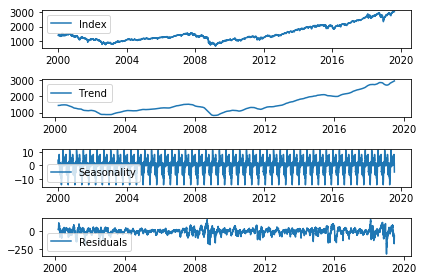

In [0]:
decomposition = seasonal_decompose(DATA.Index, freq = 100)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411) 
plt.plot(DATA.Index, label = 'Index') 
plt.legend(loc = 'best') 
plt.subplot(412) 
plt.plot(trend, label = 'Trend') 
plt.legend(loc = 'best') 
plt.subplot(413) 
plt.plot(seasonal, label = 'Seasonality') 
plt.legend(loc = 'best') 
plt.subplot(414) 
plt.plot(residual, label = 'Residuals') 
plt.legend(loc = 'best') 
plt.tight_layout()

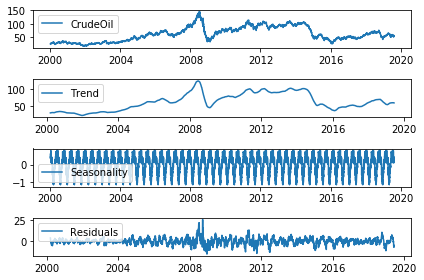

In [0]:
decomposition = seasonal_decompose(DATA.CrudeOilPrice, freq = 100)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411) 
plt.plot(DATA.CrudeOilPrice, label = 'CrudeOil') 
plt.legend(loc = 'best') 
plt.subplot(412) 
plt.plot(trend, label = 'Trend') 
plt.legend(loc = 'best') 
plt.subplot(413) 
plt.plot(seasonal, label = 'Seasonality') 
plt.legend(loc = 'best') 
plt.subplot(414) 
plt.plot(residual, label = 'Residuals') 
plt.legend(loc = 'best') 
plt.tight_layout()


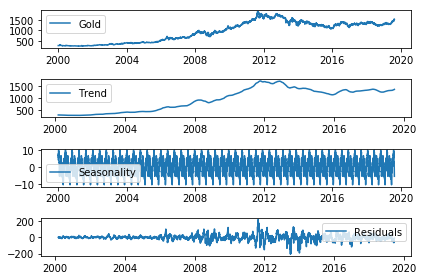

In [0]:
decomposition = seasonal_decompose(DATA.GoldPrice, freq = 100)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411) 
plt.plot(DATA.GoldPrice, label = 'Gold') 
plt.legend(loc = 'best') 
plt.subplot(412) 
plt.plot(trend, label = 'Trend') 
plt.legend(loc = 'best') 
plt.subplot(413) 
plt.plot(seasonal, label = 'Seasonality') 
plt.legend(loc = 'best') 
plt.subplot(414) 
plt.plot(residual, label = 'Residuals') 
plt.legend(loc = 'best') 
plt.tight_layout()


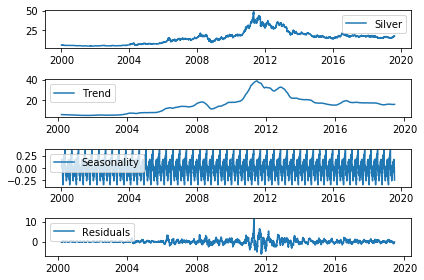

In [0]:
decomposition = seasonal_decompose(DATA.SilverPrice, freq = 100)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411) 
plt.plot(DATA.SilverPrice, label = 'Silver') 
plt.legend(loc = 'best') 
plt.subplot(412) 
plt.plot(trend, label = 'Trend') 
plt.legend(loc = 'best') 
plt.subplot(413) 
plt.plot(seasonal, label = 'Seasonality') 
plt.legend(loc = 'best') 
plt.subplot(414) 
plt.plot(residual, label = 'Residuals') 
plt.legend(loc = 'best') 
plt.tight_layout()


In [0]:
pip install TA-lib

  Using cached https://files.pythonhosted.org/packages/90/05/d4c6a778d7a7de0be366bc4a850b4ffaeac2abad927f95fa8ba6f355a082/TA-Lib-0.4.17.tar.gz
  ERROR: Failed building wheel for TA-lib
  Running setup.py clean for TA-lib
Failed to build TA-lib
  Running setup.py install for TA-lib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-78tn1kk0/TA-lib/setup.py'"'"'; __file__='"'"'/tmp/pip-install-78tn1kk0/TA-lib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-xe0k6z4g/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [3]:
pip install h2o

     |████████████████████████████████| 123.6MB 1.2MB/s 
  Created wheel for h2o: filename=h2o-3.26.0.3-py2.py3-none-any.whl size=123649955 sha256=c2f496623ced1a9a65a11ebbacabdb9f52428ff0faafca23f81413b3492fa374
  Stored in directory: /root/.cache/pip/wheels/4a/a6/8d/0880c51d5aa9746a87f61d9b66d8a98e7b9cf400c81ffc944e
Successfully built h2o


In [0]:
import h2o

In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj9b_ut_7
  JVM stdout: /tmp/tmpj9b_ut_7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj9b_ut_7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_unknownUser_xkp2ir
H2O cluster total nodes:,1
H2O cluster free memory:,2.938 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"
